

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv("/Users/gracepolito/Desktop/Master of Data Science/BA - Forage/customer_booking.csv",
                 encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [21]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [22]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [23]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [24]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [26]:
corr_matrix = df.select_dtypes(include='number').corr()

# Display the first few correlations
corr_matrix

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.212606,-0.115850,0.015607,0.015407,0.120404,0.028544,0.022943,-0.063169,0.024116
purchase_lead,0.212606,1.000000,-0.076560,0.035973,0.036531,-0.022207,-0.004499,-0.022653,0.067866,-0.022131
length_of_stay,-0.115850,-0.076560,1.000000,-0.024872,-0.000310,0.176757,0.032264,0.098828,0.141181,-0.042408
flight_hour,0.015607,0.035973,-0.024872,1.000000,0.024086,-0.011434,0.012171,0.013014,-0.002101,0.007127
flight_day,0.015407,0.036531,-0.000310,0.024086,1.000000,-0.002503,0.005392,0.009281,0.018434,-0.006986
wants_extra_baggage,0.120404,-0.022207,0.176757,-0.011434,-0.002503,1.000000,0.207669,0.216470,0.057054,0.068139
wants_preferred_seat,0.028544,-0.004499,0.032264,0.012171,0.005392,0.207669,1.000000,0.315088,0.101289,0.050116
wants_in_flight_meals,0.022943,-0.022653,0.098828,0.013014,0.009281,0.216470,0.315088,1.000000,0.154312,0.026511
flight_duration,-0.063169,0.067866,0.141181,-0.002101,0.018434,0.057054,0.101289,0.154312,1.000000,-0.106266
booking_complete,0.024116,-0.022131,-0.042408,0.007127,-0.006986,0.068139,0.050116,0.026511,-0.106266,1.000000


In [27]:
from sklearn.feature_selection import mutual_info_classif
X = pd.get_dummies(df.drop('booking_complete', axis=1), drop_first=True)
y = df['booking_complete']
mi = pd.Series(mutual_info_classif(X, y), index=X.columns).sort_values(ascending=False)
mi.head(10) # Display top 10 features by mutual information - Ranks most informative features


booking_origin_Australia    0.028011
booking_origin_Malaysia     0.021268
flight_duration             0.016072
wants_extra_baggage         0.009189
length_of_stay              0.007140
trip_type_RoundTrip         0.006971
route_ICNPEN                0.005028
route_MAAWUH                0.004050
route_PENTPE                0.004035
route_HGHKBV                0.003867
dtype: float64

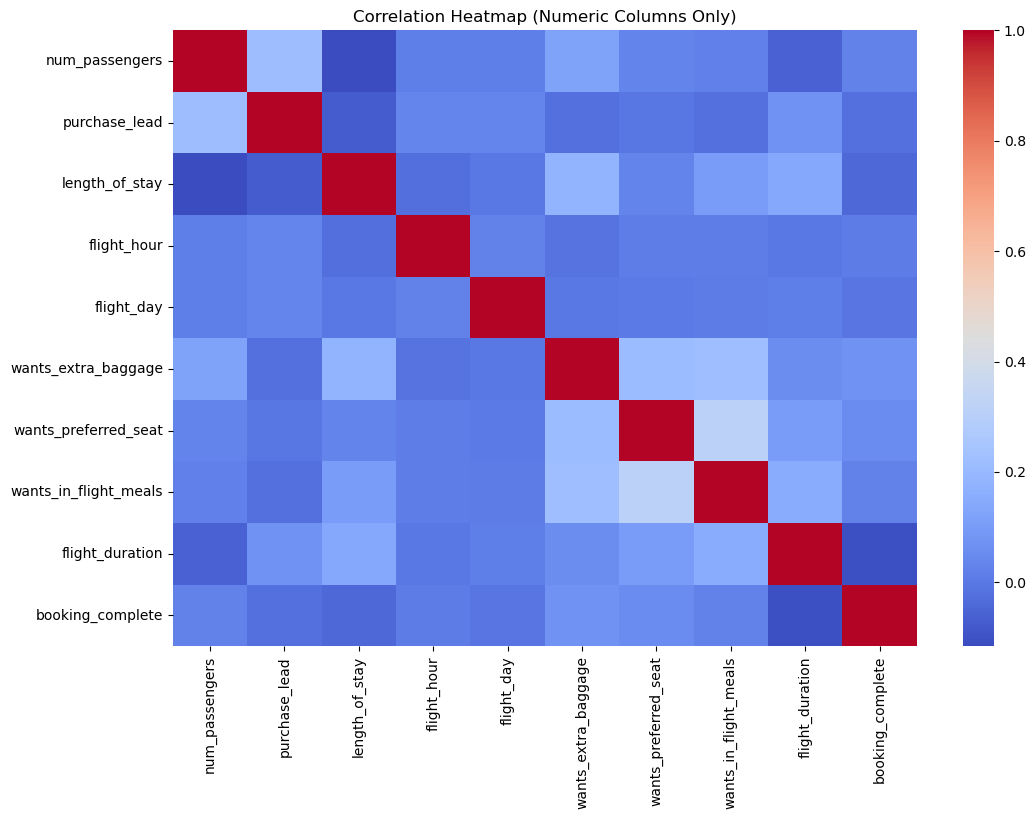

In [28]:
num_df = df.select_dtypes(include=[np.number])  # keeps ints/floats only

plt.figure(figsize=(12,8))
sns.heatmap(num_df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show() #This visualizes which features most influence booking_complete

In [31]:
# Add-on engagement score
df['addons_total'] = df[['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']].sum(axis=1)

# Trip type encoding
df['is_return_trip'] = (df['trip_type'] == 'Return').astype(int)

# Long stay flag
df['long_stay'] = (df['length_of_stay'] > 7).astype(int)

# Lead time bins (categorical)
df['lead_time_bin'] = pd.cut(df['purchase_lead'],
                             bins=[0, 7, 30, 90, 365],
                             labels=['Last-minute', 'Short', 'Medium', 'Early'])


In [32]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [33]:
X = df_encoded.drop('booking_complete', axis=1)
y = df_encoded['booking_complete']


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [38]:
#Train a Baseline Model 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=42))
model.fit(X_train, y_train)




Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [39]:
print("Converged:", model[-1].n_iter_ if hasattr(model, '__getitem__') else model.n_iter_)


Converged: [202]


Accuracy : 0.846
Precision: 0.439
Recall   : 0.1
F1       : 0.163
ROC AUC  : 0.776

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92     12757
           1       0.44      0.10      0.16      2243

    accuracy                           0.85     15000
   macro avg       0.65      0.54      0.54     15000
weighted avg       0.80      0.85      0.80     15000



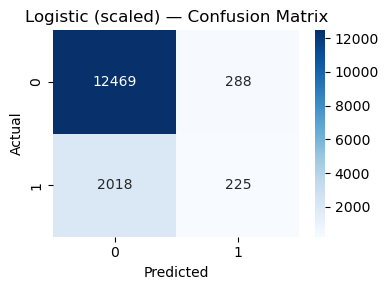

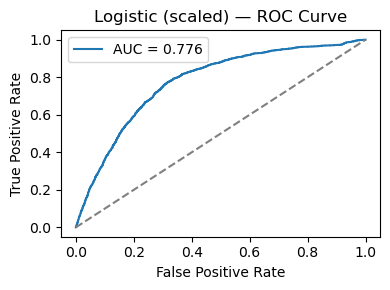

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Metrics
print("Accuracy :", accuracy_score(y_test, y_pred).round(3))
print("Precision:", precision_score(y_test, y_pred).round(3))
print("Recall   :", recall_score(y_test, y_pred).round(3))
print("F1       :", f1_score(y_test, y_pred).round(3))
print("ROC AUC  :", roc_auc_score(y_test, y_proba).round(3))
print("\nClassification report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic (scaled) — Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.tight_layout(); plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.3f}")
plt.plot([0,1],[0,1],"--", color="grey")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("Logistic (scaled) — ROC Curve"); plt.legend()
plt.tight_layout(); plt.show()


In [ ]:
from sklearn.metrics import f1_score

y_proba = model.predict_proba(X_test)[:,1]
thresholds = np.linspace(0.05, 0.9, 50)
f1s = [f1_score(y_test, (y_proba>=t).astype(int)) for t in thresholds]

best_t = thresholds[np.argmax(f1s)]
print(f"Best threshold for F1: {best_t:.2f}")


Best threshold for F1: 0.22


Classification report (threshold = 0.22):
              precision    recall  f1-score   support

           0       0.92      0.78      0.85     12757
           1       0.34      0.63      0.44      2243

    accuracy                           0.76     15000
   macro avg       0.63      0.71      0.64     15000
weighted avg       0.84      0.76      0.79     15000

ROC AUC: 0.776


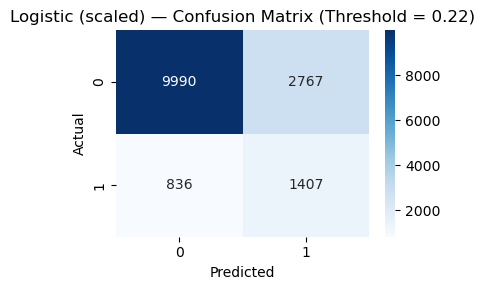

In [43]:
# Apply tuned threshold
best_t = 0.22
y_pred_tuned = (y_proba >= best_t).astype(int)

print("Classification report (threshold = 0.22):")
print(classification_report(y_test, y_pred_tuned))
print("ROC AUC:", roc_auc_score(y_test, y_proba).round(3))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic (scaled) — Confusion Matrix (Threshold = 0.22)")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.tight_layout(); plt.show()

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced_subsample',
    n_jobs=-1
)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)[:, 1]

print("Random Forest Results:\n")
print(classification_report(y_test, rf_pred))
print("ROC AUC:", roc_auc_score(y_test, rf_proba).round(3))


Random Forest Results:

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     12757
           1       0.51      0.12      0.19      2243

    accuracy                           0.85     15000
   macro avg       0.69      0.55      0.56     15000
weighted avg       0.81      0.85      0.81     15000

ROC AUC: 0.78


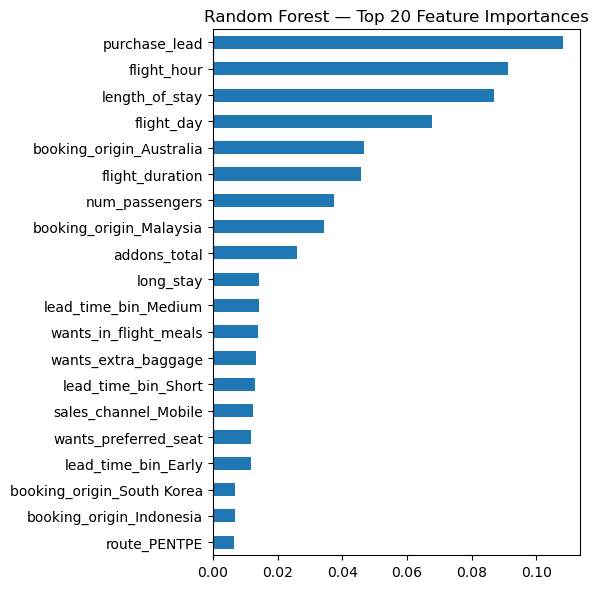

In [46]:
pd.Series(rf.feature_importances_, index=X.columns)\
  .sort_values(ascending=False).head(20)\
  .plot(kind='barh', figsize=(6,6), title='Random Forest — Top 20 Feature Importances')
plt.gca().invert_yaxis(); plt.tight_layout(); plt.show()

In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print("Cross-validated AUC:", scores.mean().round(3))


Cross-validated AUC: 0.664


## Model Comparison & Insights

| Model | Accuracy | Precision (1) | Recall (1) | F1 (1) | ROC AUC |
|:--|:--:|:--:|:--:|:--:|:--:|
| Logistic (0.5 threshold) | 0.85 | 0.44 | 0.10 | 0.16 | 0.78 |
| Logistic (0.22 threshold) | 0.76 | 0.34 | 0.63 | **0.44** | **0.78** |
| Random Forest | 0.85 | 0.51 | 0.12 | 0.19 | 0.78 |

**Interpretation:**  
- Lowering the threshold in the logistic model meaningfully improved recall and F1 without hurting AUC.  
- Random Forest confirms the same ranking strength but focuses on precision.  
- The strongest drivers of completion were `purchase_lead`, `flight_hour`, `length_of_stay`, and `addons_total`.  

**Conclusion:**  
Both models are viable. For explainability and probability-based forecasting, the tuned logistic model is preferred; for complex interactions and feature exploration, Random Forest adds valuable complementary insight.


### Final Summary 

##### This project explored, prepared, and modeled British Airways’ customer booking dataset to predict booking completion. The dataset was examined for structure, data types, and distributions, and new features such as weekend flights, add-on totals, and lead-time categories were engineered to capture customer behavior. After preprocessing (encoding and scaling), two interpretable machine learning models were trained — Logistic Regression and Random Forest. The Logistic model achieved strong ranking performance (AUC ≈ 0.78) and, after threshold tuning to 0.22, improved recall to 63%, providing actionable probabilities for identifying likely bookings. The Random Forest confirmed similar AUC while revealing that purchase lead, flight timing, stay length, and add-on purchases were the most important predictive features. Evaluation through accuracy, precision, recall, F1, and ROC analysis demonstrated that both models offer valuable insight into customer behavior, with the tuned Logistic model best balancing interpretability and predictive usefulness.
